# importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing

## Importing dataset

In [3]:
df_cars = pd.read_csv("D:/Coursera/IBM data engineer/Exploratory Data Analysis for Machine Learning/auto-mpg.csv")

In [4]:
df_cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## EDA ( Exploratory Data Analysis)

In [43]:
print("############################################")
print("          Info Of the Data Set")
print("############################################")
df_cars.info()

############################################
          Info Of the Data Set
############################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int32  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 26.6+ KB


# 

In [6]:
df_cars.horsepower = df_cars.horsepower.str.replace('?','NaN').astype(float)
df_cars.horsepower.fillna(df_cars.horsepower.mean(),inplace=True)
df_cars.horsepower = df_cars.horsepower.astype(int)
print("######################################################################")
print("          After Cleaning and type covertion in the Data Set")
print("######################################################################")
df_cars.info()

######################################################################
          After Cleaning and type covertion in the Data Set
######################################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int32  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 26.6+ KB


In [8]:
df_cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## Group by names

In [9]:
df_cars.groupby(['car name']).sum().head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
amc ambassador brougham,13.0,8,360.0,175,3821,11.0,73,1
amc ambassador dpl,15.0,8,390.0,190,3850,8.5,70,1
amc ambassador sst,17.0,8,304.0,150,3672,11.5,72,1
amc concord,43.7,10,383.0,180,6213,37.3,158,2
amc concord d/l,18.1,6,258.0,120,3410,15.1,78,1


## Summary of Statistics

In [10]:
display(df_cars.describe().round(2))

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.00,398.00,398.00,398.00,398.00,398.00,398.00,398.00
mean,23.51,5.45,193.43,104.46,2970.42,15.57,76.01,1.57
std,7.82,1.70,104.27,38.20,846.84,2.76,3.70,0.80
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00,1.00
25%,17.50,4.00,104.25,76.00,2223.75,13.82,73.00,1.00
50%,23.00,4.00,148.50,95.00,2803.50,15.50,76.00,1.00
75%,29.00,8.00,262.00,125.00,3608.00,17.18,79.00,2.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00,3.00


In [11]:
meanhp = df_cars['horsepower'].mean()
df_cars['horsepower'] = df_cars['horsepower'].fillna(meanhp)

# # Skewness & Kurtosis

In [17]:
print("Skewness: %f" %df_cars['mpg'].skew())
print("Kurtosis: %f" %df_cars['mpg'].kurt())

Skewness: 0.457066
Kurtosis: -0.510781


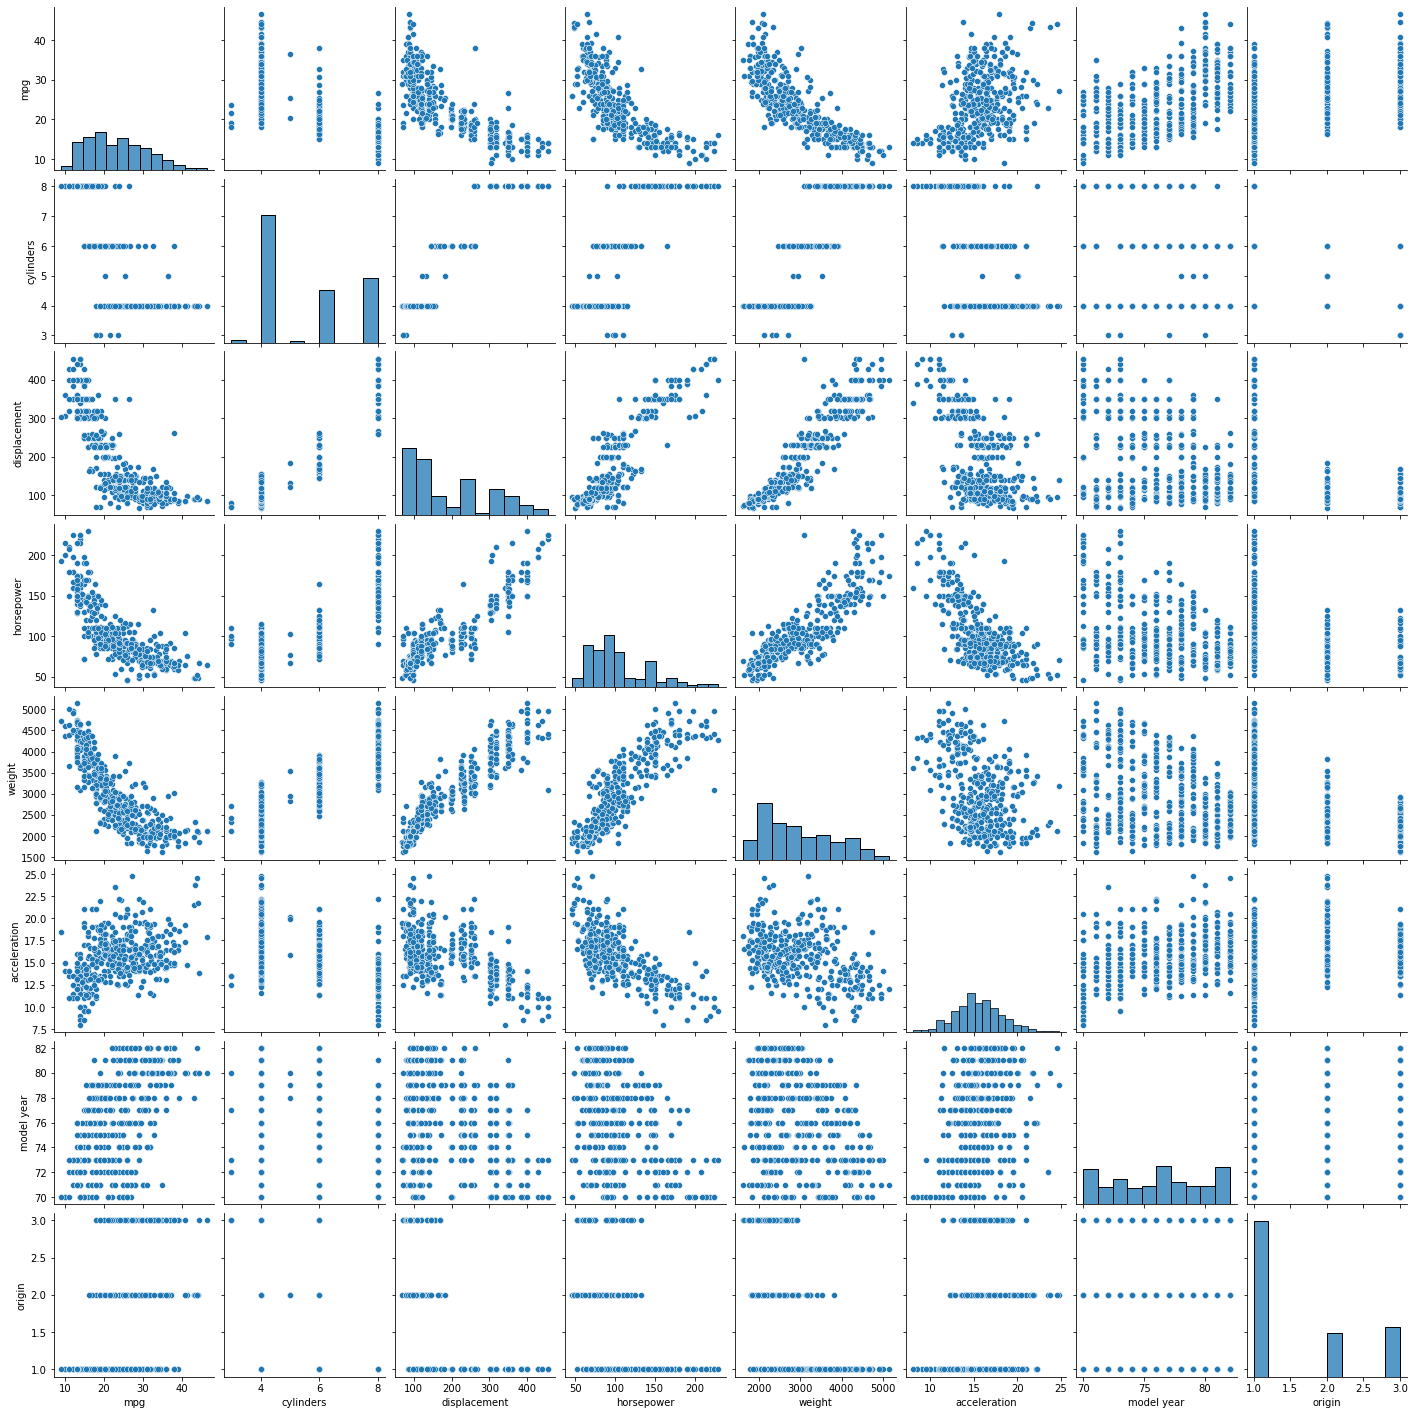

In [24]:
sns.pairplot(df_cars)

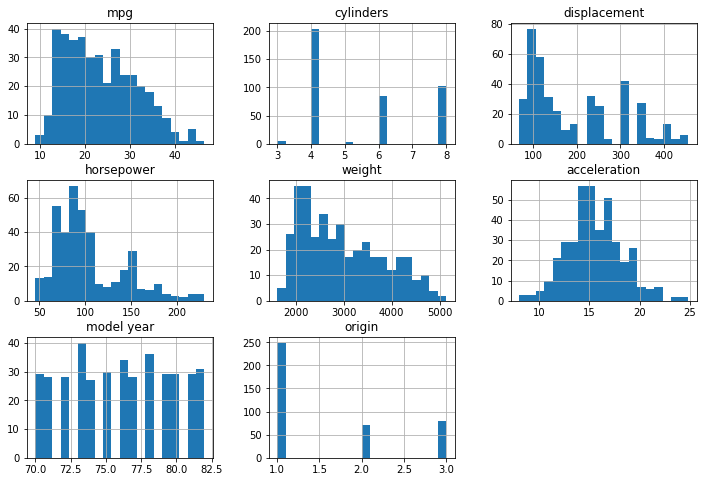

<AxesSubplot:>

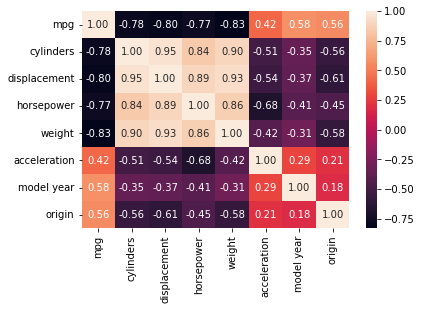

In [28]:
df_cars.hist(figsize=(12,8),bins=20)
plt.show()
sns.heatmap(df_cars.corr(), annot=True, fmt='.2f')

### Relationship between the Miles Per Gallon (mpg) and the other features.
### Strong Negative correlation between displacement, horsepower, weight, and cylinders.
### This implies that, as any one of those variables increases, the mpg decreases.
### Strong Positive correlations between the displacement, horsepower, weight, and cylinders.
### This violates the non-multicollinearity assumption of Linear regression.

# # distplot

D:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


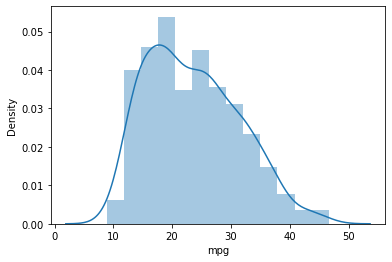

In [29]:
sns.distplot(df_cars["mpg"])
plt.show()

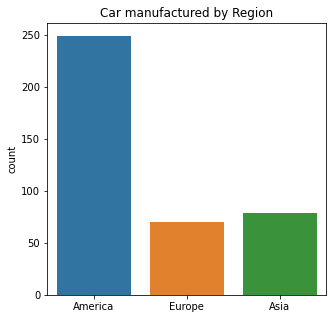

In [37]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot(x = df_cars.origin.values, data=df_cars)
xlab = [item.get_text() for item in ax.get_xticklabels()]
xlab[0] ='America'
xlab[1] = 'Europe'
xlab[2] = 'Asia'
ax.set_xticklabels(xlab)
ax.set_title('Car manufactured by Region')
plt.show()

# Hypothesis Testing
  Ho: mpg is independent of displacement 

The null hypothesis is rejected which means displacement has significance to mpg.

Further similar analysis can be carried out on other features to test their significance to the total crash.

In [42]:
var1 = df_cars.mpg
var2 = df_cars.displacement

from scipy.stats import pearsonr
stat, p = pearsonr(var1, var2)
print('\nPearson\'s Correlation Test \nstat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')
    
# Example of the Student's t-test
from scipy.stats import ttest_ind
stat, p = ttest_ind(var1, var2)
print('\nStudent\'s T-test \nstat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')
    
# Example of the Paired Student's t-test
from scipy.stats import ttest_rel
stat, p = ttest_rel(var1, var2)
print('\nPaired Student\'s T-Test \nstat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')
    
# Example of the Analysis of Variance Test
from scipy.stats import f_oneway
stat, p = f_oneway(var1, var2)
print('\nANOVA \nstat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')


Pearson's Correlation Test 
stat=-0.804, p=0.000
Probably dependent

Student's T-test 
stat=-32.418, p=0.000
Probably different distributions

Paired Student's T-Test 
stat=-30.634, p=0.000
Probably different distributions

ANOVA 
stat=1050.937, p=0.000
Probably different distributions


## Thank You



# Nirmal Joy